In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [ ]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### **Exploratory Data Analysis and Visualization**

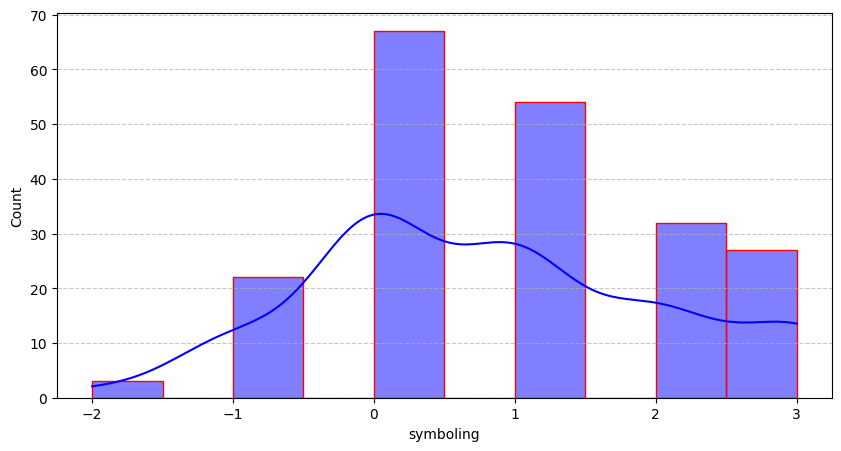

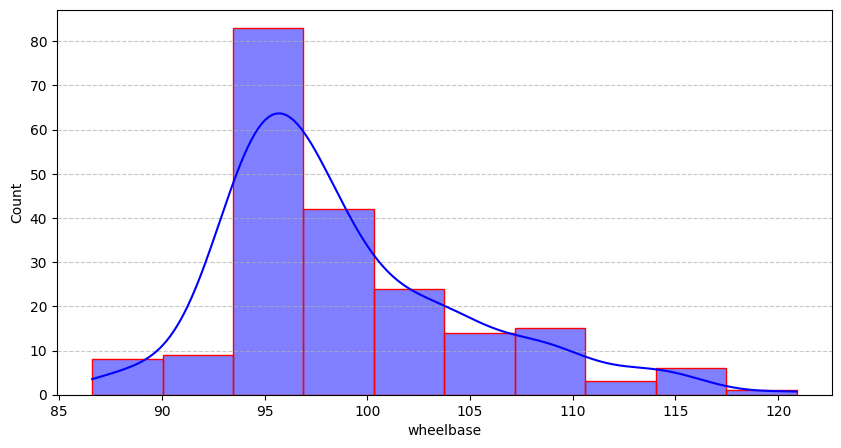

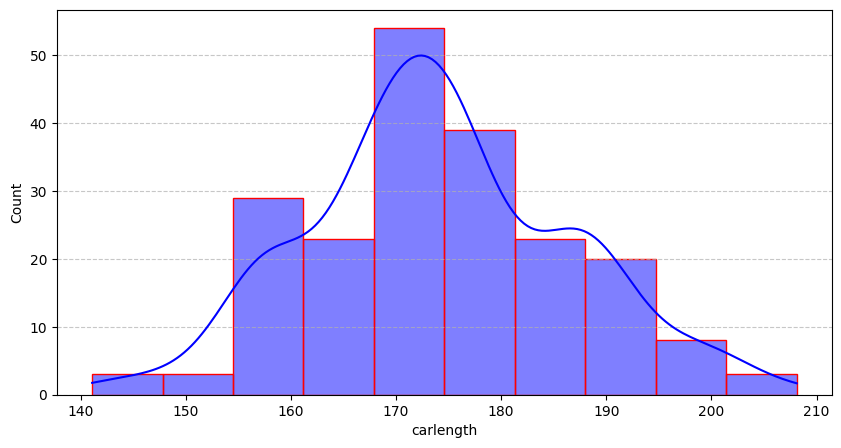

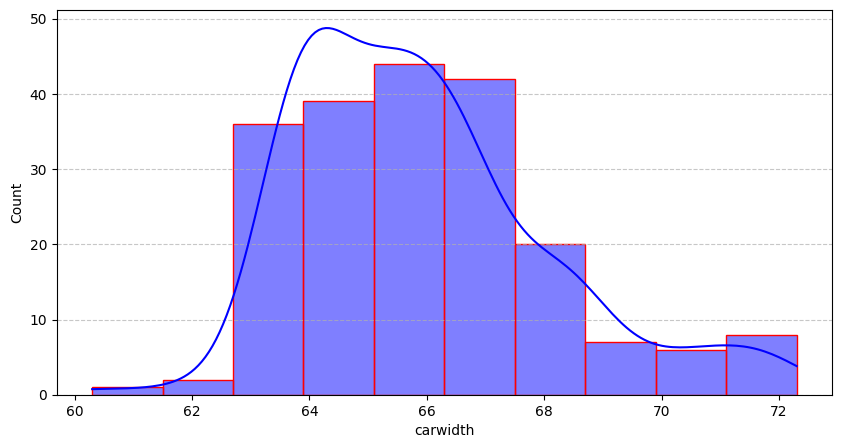

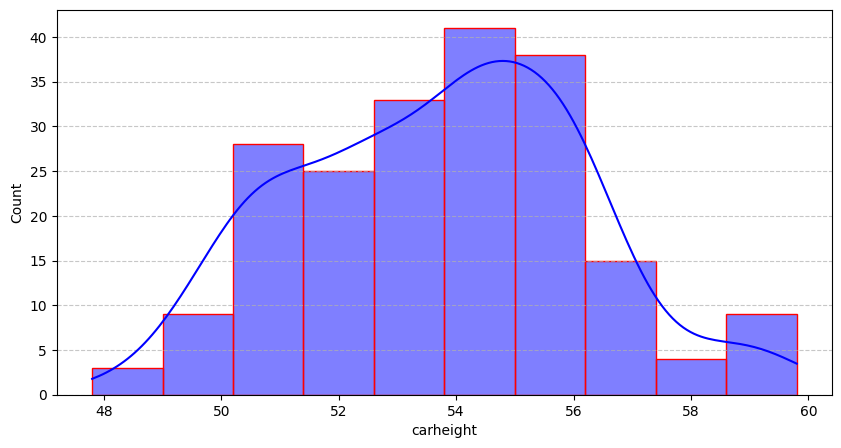

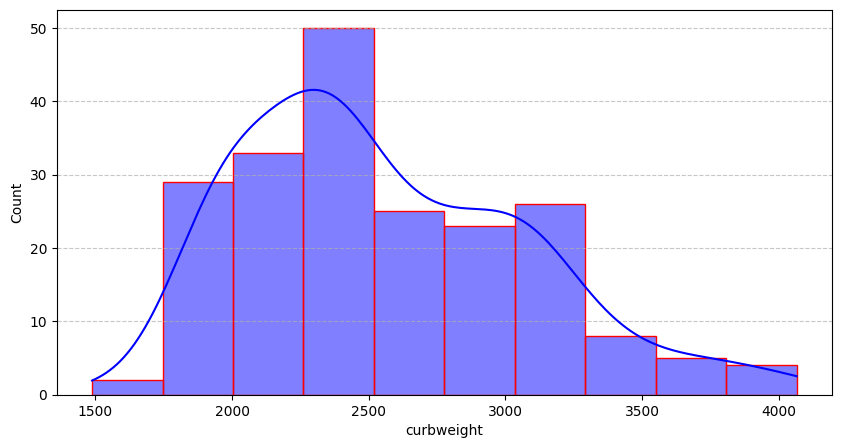

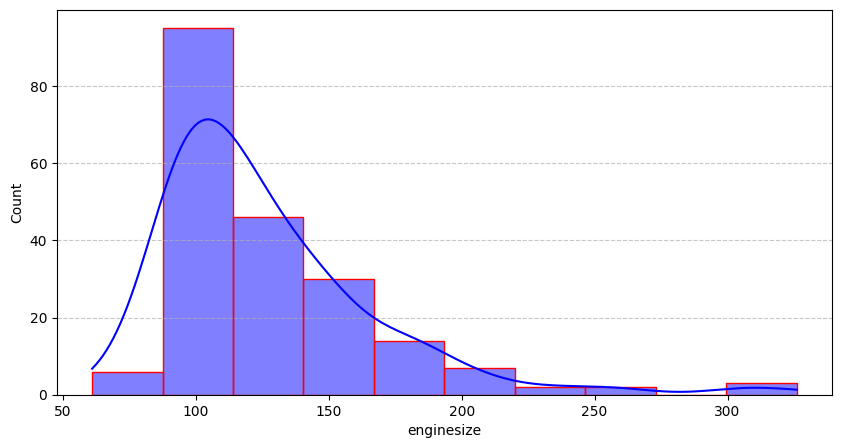

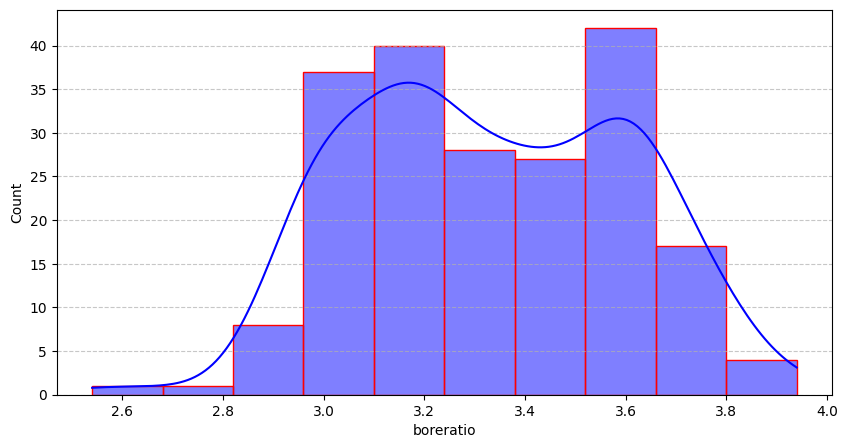

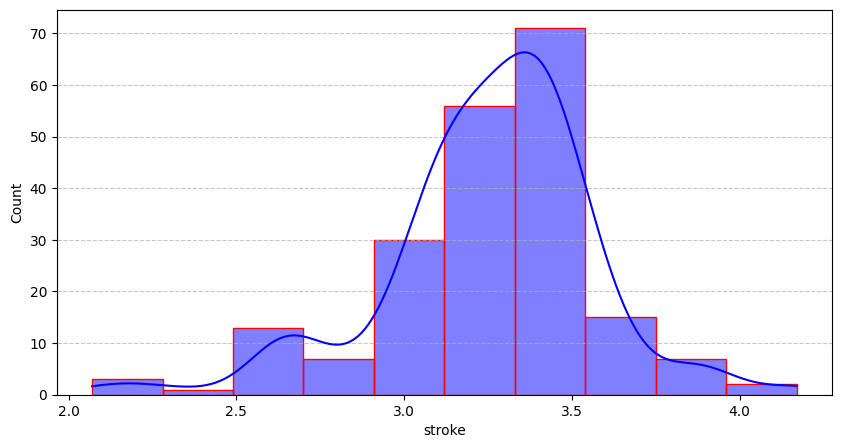

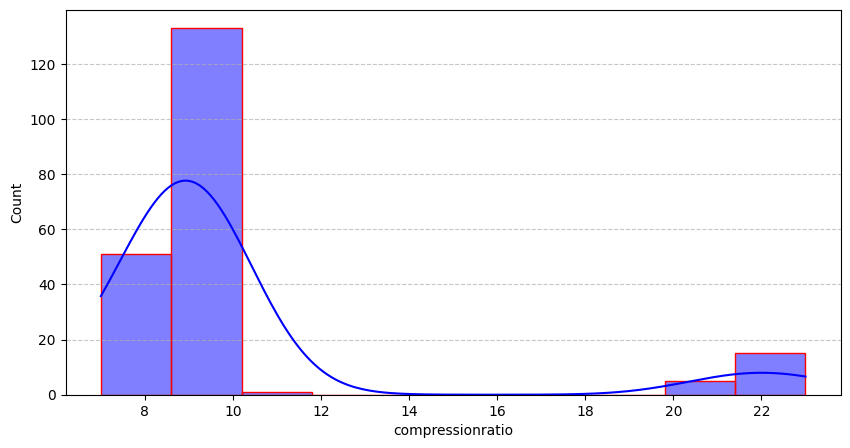

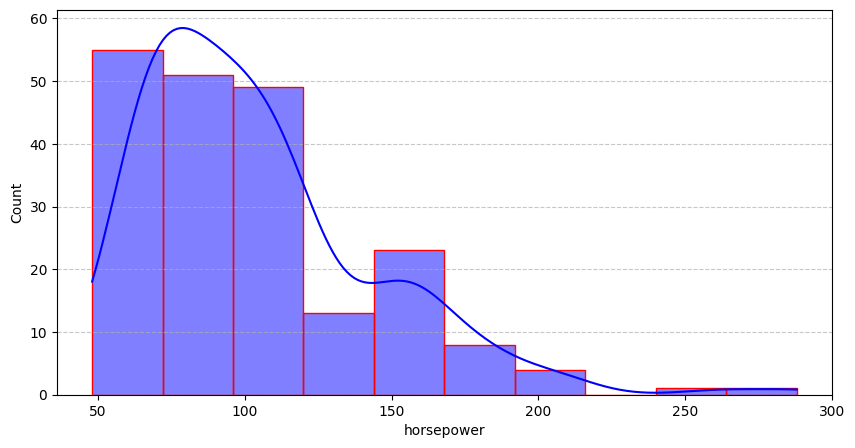

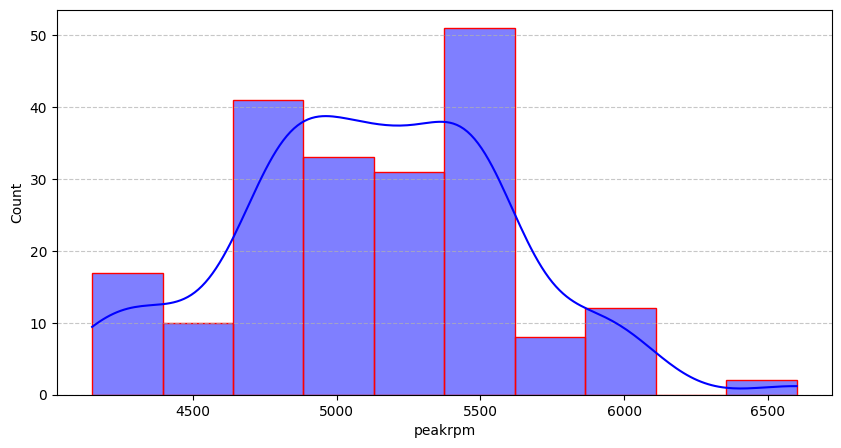

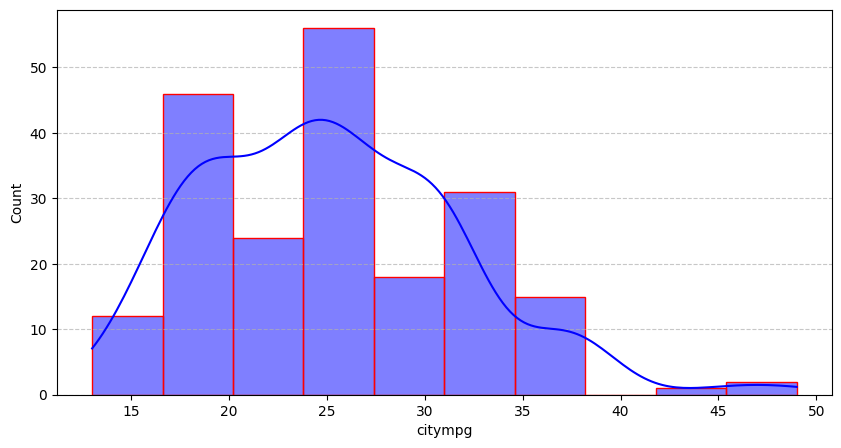

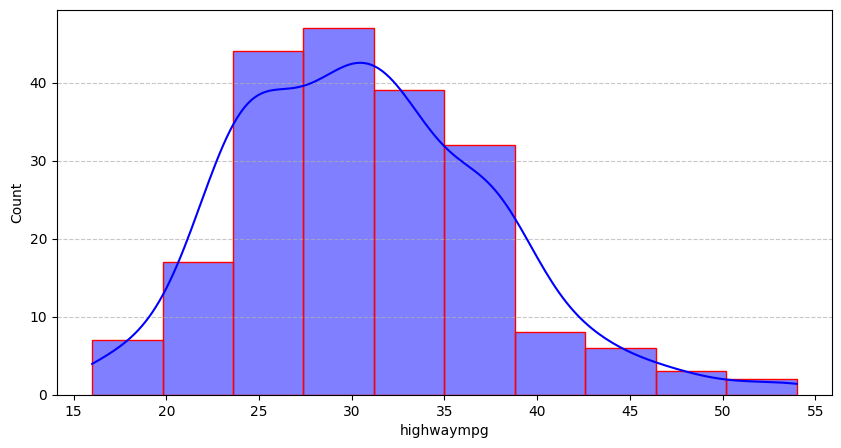

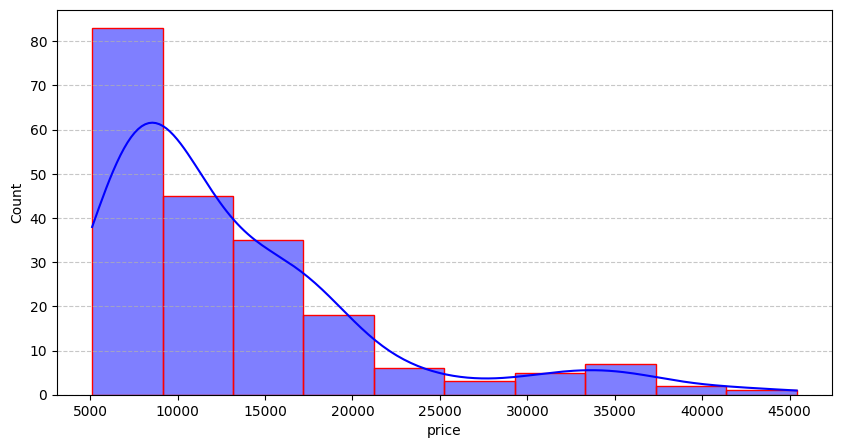

In [ ]:

def histogram(column):
  sns.set_palette('mako')
  plt.figure(figsize=(10,5))
  sns.histplot(data=df[column],bins=10, kde=True, color='blue', edgecolor='red')
  plt.grid(axis='y', linestyle='--',alpha=0.7)
  plt.show()

for x in df.select_dtypes(include=['int64','float64']).columns.to_list()[1:]:
  histogram(x)

Text(0, 0.5, 'price')

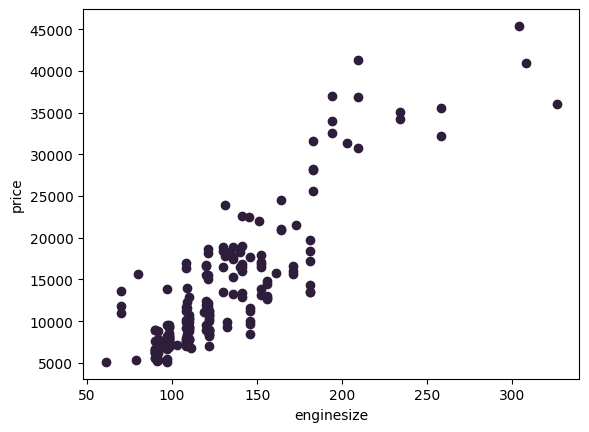

In [ ]:
plt.scatter(df.enginesize,df.price)
plt.xlabel('enginesize')
plt.ylabel('price')

Text(0, 0.5, 'price')

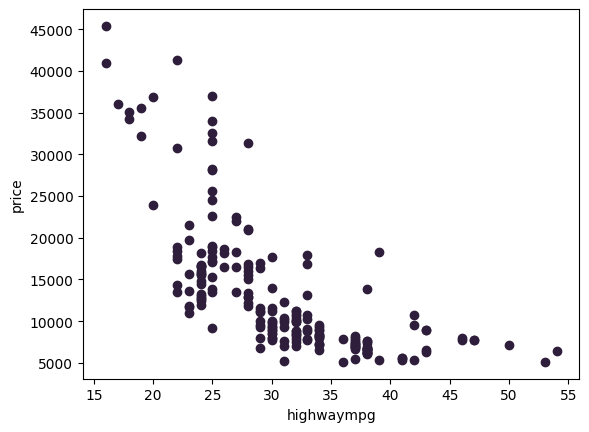

In [ ]:
plt.scatter(df.highwaympg,df.price)
plt.xlabel('highwaympg')
plt.ylabel('price')

Text(0, 0.5, 'price')

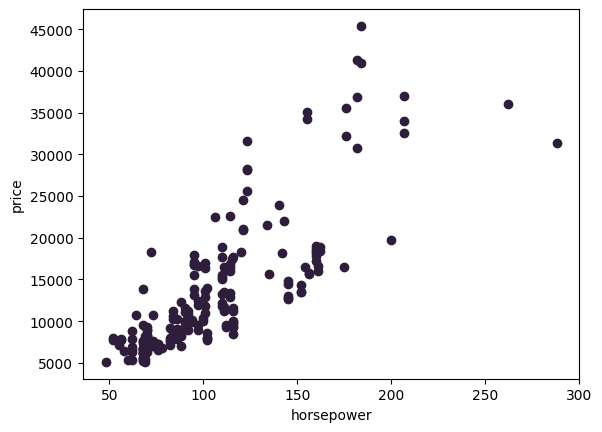

In [ ]:
plt.scatter(df.horsepower,df.price)
plt.xlabel('horsepower')
plt.ylabel('price')


In [ ]:
def clean_carname(car_name):
  return car_name.split(" ")[0].lower()

df['CarName'] = df['CarName'].apply(clean_carname)
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### **fix typing mistakes**

In [ ]:
df['CarName'] = df['CarName'].str.replace("vw","volkswagen")
df['CarName'] = df['CarName'].str.replace('maxda','mazda')
df['CarName'] = df['CarName'].str.replace('toyouta','toyota')
df['CarName'] = df['CarName'].str.replace('porcshce', 'porsche')
df['CarName'] = df['CarName'].str.replace('vokswagen', 'volkswagen')

In [ ]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

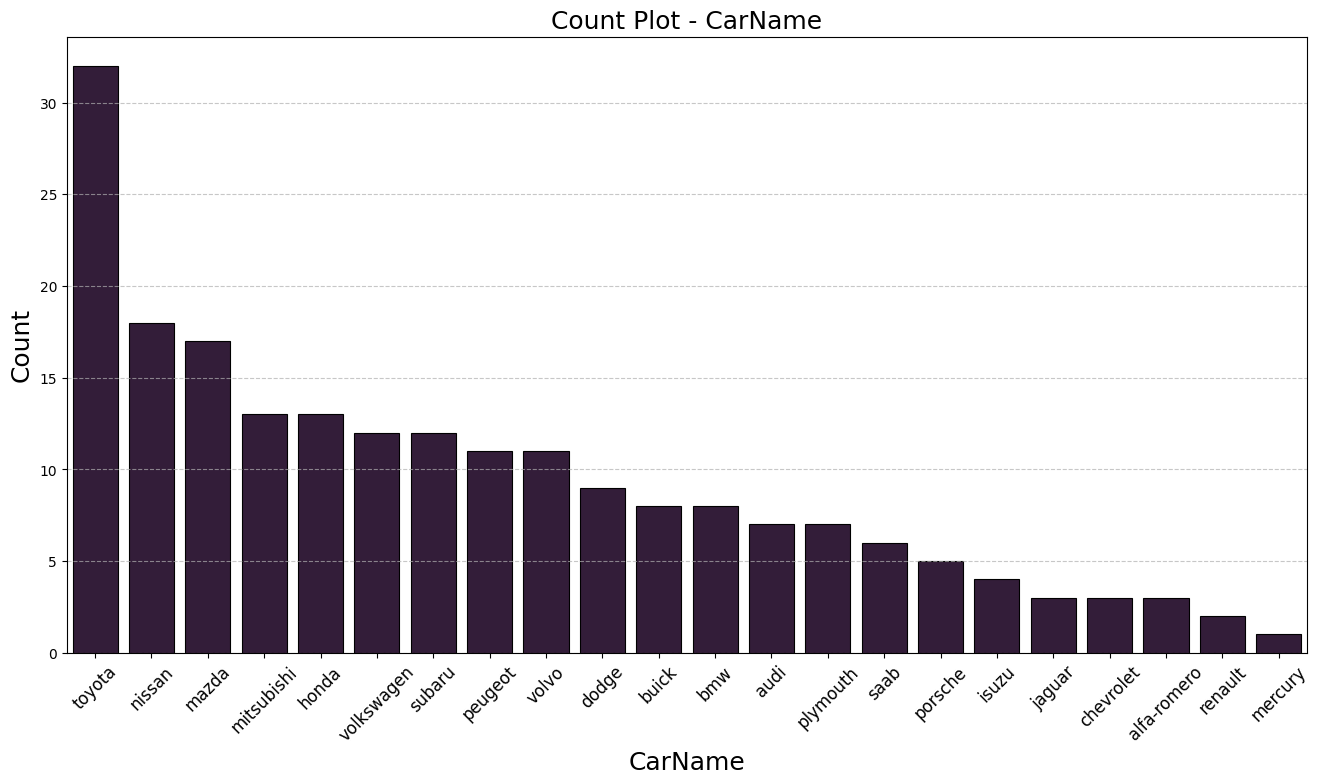

In [ ]:
def count_plot(column):
  sns.set_palette('rocket')
  plt.figure(figsize=(16,8))
  sns.countplot(data=df,x=column, order=df[column].value_counts().index, edgecolor='black',linewidth=.8)

  plt.title(f'Count Plot - {column}', fontsize=18)
  plt.xlabel(column,fontsize=18)
  plt.ylabel('Count',fontsize=18)
  plt.xticks(rotation=45, fontsize=12)
  plt.grid(axis='y',linestyle='--',alpha=0.7)
  plt.show()
count_plot('CarName')


In [ ]:
df.drop(columns=['car_ID'],inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
print(categorical_columns)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [ ]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_columns = numerical_columns[:-1]
print(numerical_columns)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


### **Data Preprocessing**

In [ ]:
x = df.drop('price', axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test_tem,y_train,y_test_tem = train_test_split(x,y,test_size=0.15,random_state=42)
x_train.shape
y_train.shape

(174,)

In [ ]:
x_val,x_test,y_val,y_test = train_test_split(x_test_tem,y_test_tem,test_size=.5,random_state=42)
x_test.shape


(16, 24)

In [ ]:
x_val.shape

(15, 24)

In [ ]:


# Create transformers for categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # Change StandardScaler to MinMaxScaler
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ],
    remainder='passthrough'  # Include non-transformed columns
)

#Apply transformations to training, validation, and test sets
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_val_preprocessed = preprocessor.transform(x_val)
x_test_preprocessed = preprocessor.transform(x_test)

transformed_feature_names = preprocessor.get_feature_names_out()
column_names_after_transform = transformed_feature_names.tolist() + x.columns.difference(categorical_columns + numerical_columns).tolist()



print(pd.DataFrame(x_train_preprocessed, columns=column_names_after_transform).head())
print(pd.DataFrame(x_val_preprocessed, columns=column_names_after_transform).head())
print(pd.DataFrame(x_test_preprocessed, columns=column_names_after_transform).head())

   cat__CarName_audi  cat__CarName_bmw  cat__CarName_buick  \
0                0.0               0.0                 0.0   
1                0.0               0.0                 0.0   
2                0.0               0.0                 0.0   
3                0.0               0.0                 0.0   
4                0.0               0.0                 1.0   

   cat__CarName_chevrolet  cat__CarName_dodge  cat__CarName_honda  \
0                     0.0                 0.0                 0.0   
1                     0.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   

   cat__CarName_isuzu  cat__CarName_jaguar  cat__CarName_mazda  \
0                 0.0                  0.0                 0.0   
1                 0.0                  0.0                 0.0   
2             

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
X_train_preprocessed=pd.DataFrame(x_train_preprocessed, columns=column_names_after_transform)
X_val_preprocessed=pd.DataFrame(x_val_preprocessed, columns=column_names_after_transform)
X_test_preprocessed=pd.DataFrame(x_test_preprocessed, columns=column_names_after_transform)

### **Creat** **Model**

In [ ]:
input_dim = X_train_preprocessed.shape[1]
input_dim

63

In [ ]:
model_1 = keras.Sequential([
    layers.Dense(units = 64, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 1, activation = 'linear')
])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4096      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4161 (16.25 KB)
Trainable params: 4161 (16.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1.compile(optimizer='adam',loss='mean_absolute_error',
        metrics=[keras.metrics.MeanAbsoluteError(),keras.metrics.RootMeanSquaredError()])


In [ ]:
history_1 = model_1.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = True
)

Epoch 1/100
6/6 [==============================] - 0s 29ms/step - loss: 12650.9395 - mean_absolute_error: 12650.9395 - root_mean_squared_error: 14784.5137 - val_loss: 15139.6250 - val_mean_absolute_error: 15139.6250 - val_root_mean_squared_error: 18670.9512
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 12640.6191 - mean_absolute_error: 12640.6191 - root_mean_squared_error: 14775.7100 - val_loss: 15129.1025 - val_mean_absolute_error: 15129.1025 - val_root_mean_squared_error: 18662.0781
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 12630.1953 - mean_absolute_error: 12630.1953 - root_mean_squared_error: 14766.6074 - val_loss: 15118.4844 - val_mean_absolute_error: 15118.4844 - val_root_mean_squared_error: 18653.1270
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 12619.6738 - mean_absolute_error: 12619.6738 - root_mean_squared_error: 14757.4482 - val_loss: 15107.7666 - val_mean_absolute_error: 15107.7666 - val_root

In [ ]:
result_1 = model_1.evaluate(X_test_preprocessed.values, y_test.values)
print(model_1.metrics_names)

1/1 [==============================] - 0s 143ms/step - loss: 11560.0273 - mean_absolute_error: 11560.0273 - root_mean_squared_error: 13687.5430
['loss', 'mean_absolute_error', 'root_mean_squared_error']


In [ ]:
for i in range(len(model_1.metrics_names)):
  print("Metric", model_1.metrics_names[i], ":", str(round(result_1[i],2)))

Metric loss : 11560.03
Metric mean_absolute_error : 11560.03
Metric root_mean_squared_error : 13687.54


### **Model_2**
one layer number of units in =256

In [ ]:
model_2 = keras.Sequential([
    layers.Dense(units = 128, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 1, activation = 'linear')
])

In [ ]:
model_2.compile(optimizer='adam',loss='mean_absolute_error',
        metrics=[keras.metrics.MeanAbsoluteError(),keras.metrics.RootMeanSquaredError()])


In [ ]:
history_2 = model_2.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = True
)

Epoch 1/100
6/6 [==============================] - 1s 45ms/step - loss: 13179.3848 - mean_absolute_error: 13179.3848 - root_mean_squared_error: 15249.8857 - val_loss: 15680.2168 - val_mean_absolute_error: 15680.2168 - val_root_mean_squared_error: 19128.7344
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 13178.6553 - mean_absolute_error: 13178.6553 - root_mean_squared_error: 15249.2539 - val_loss: 15679.4775 - val_mean_absolute_error: 15679.4775 - val_root_mean_squared_error: 19128.1191
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 13177.9062 - mean_absolute_error: 13177.9062 - root_mean_squared_error: 15248.6221 - val_loss: 15678.6855 - val_mean_absolute_error: 15678.6855 - val_root_mean_squared_error: 19127.4629
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 13177.0967 - mean_absolute_error: 13177.0967 - root_mean_squared_error: 15247.8965 - val_loss: 15677.8213 - val_mean_absolute_error: 15677.8213 - val_root_me

In [ ]:
result_2 = model_2.evaluate(X_test_preprocessed.values, y_test.values)
print(model_2.metrics_names)

1/1 [==============================] - 0s 125ms/step - loss: 11127.9824 - mean_absolute_error: 11127.9824 - root_mean_squared_error: 13313.5693
['loss', 'mean_absolute_error', 'root_mean_squared_error']


In [ ]:
for i in range(len(model_2.metrics_names)):
  print("Metric", model_2.metrics_names[i], ":", str(round(result_2[i],2)))

Metric loss : 11127.98
Metric mean_absolute_error : 11127.98
Metric root_mean_squared_error : 13313.57


### **Model_3 **

In [ ]:
model_3 = keras.Sequential([
    layers.Dense(256, input_dim=X_train_preprocessed.shape[1], activation="relu"),
    layers.Dense(1, activation="linear")
])

In [ ]:
model_3.compile(optimizer='adam',loss='mean_absolute_error',
        metrics=[keras.metrics.MeanAbsoluteError(),keras.metrics.RootMeanSquaredError()])


In [ ]:
history_3 = model_3.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = True
)

Epoch 1/100
6/6 [==============================] - 1s 43ms/step - loss: 13179.0547 - mean_absolute_error: 13179.0547 - root_mean_squared_error: 15249.6475 - val_loss: 15679.6396 - val_mean_absolute_error: 15679.6396 - val_root_mean_squared_error: 19128.2793
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 13178.0723 - mean_absolute_error: 13178.0723 - root_mean_squared_error: 15248.7793 - val_loss: 15678.6113 - val_mean_absolute_error: 15678.6113 - val_root_mean_squared_error: 19127.3867
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 13177.0254 - mean_absolute_error: 13177.0254 - root_mean_squared_error: 15247.8438 - val_loss: 15677.4775 - val_mean_absolute_error: 15677.4775 - val_root_mean_squared_error: 19126.3984
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 13175.8438 - mean_absolute_error: 13175.8438 - root_mean_squared_error: 15246.8086 - val_loss: 15676.1660 - val_mean_absolute_error: 15676.1660 - val_root_me

In [ ]:
result_3 = model_3.evaluate(X_test_preprocessed.values, y_test.values)
print(model_3.metrics_names)

1/1 [==============================] - 0s 153ms/step - loss: 10263.1094 - mean_absolute_error: 10263.1094 - root_mean_squared_error: 12574.8721
['loss', 'mean_absolute_error', 'root_mean_squared_error']


In [ ]:
for i in range(len(model_3.metrics_names)):
  print("Metric", model_3.metrics_names[i], ":", str(round(result_3[i],2)))

Metric loss : 10263.11
Metric mean_absolute_error : 10263.11
Metric root_mean_squared_error : 12574.87


### **Model_4**

In [ ]:
model_4 = keras.Sequential([
    layers.Dense(units = 512, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 1, activation = 'linear')
])



In [ ]:
model_4.compile(optimizer='adam',loss='mean_absolute_error',
        metrics=[keras.metrics.MeanAbsoluteError(),keras.metrics.RootMeanSquaredError()])


In [ ]:
history_4 = model_4.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = True)

Epoch 1/100
6/6 [==============================] - 1s 47ms/step - loss: 13178.7158 - mean_absolute_error: 13178.7158 - root_mean_squared_error: 15249.3691 - val_loss: 15679.0469 - val_mean_absolute_error: 15679.0469 - val_root_mean_squared_error: 19127.8047
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 13177.3027 - mean_absolute_error: 13177.3027 - root_mean_squared_error: 15248.1182 - val_loss: 15677.4941 - val_mean_absolute_error: 15677.4941 - val_root_mean_squared_error: 19126.5020
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 13175.6621 - mean_absolute_error: 13175.6621 - root_mean_squared_error: 15246.6504 - val_loss: 15675.6191 - val_mean_absolute_error: 15675.6191 - val_root_mean_squared_error: 19124.9121
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 13173.6641 - mean_absolute_error: 13173.6641 - root_mean_squared_error: 15244.9316 - val_loss: 15673.3330 - val_mean_absolute_error: 15673.3330 - val_root_m

In [ ]:
result_4 = model_4.evaluate(X_test_preprocessed.values, y_test.values)
print(model_4.metrics_names)

1/1 [==============================] - 0s 131ms/step - loss: 8414.7500 - mean_absolute_error: 8414.7500 - root_mean_squared_error: 11061.7441
['loss', 'mean_absolute_error', 'root_mean_squared_error']


In [ ]:
for i in range(len(model_4.metrics_names)):
  print("Metric", model_4.metrics_names[i], ":", str(round(result_4[i],2)))

Metric loss : 8414.75
Metric mean_absolute_error : 8414.75
Metric root_mean_squared_error : 11061.74


### **Model_5**

In [ ]:
model_5 = keras.Sequential([
    layers.Dense(units = 32, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 1, activation = 'linear')
])



In [ ]:
model_5.compile(optimizer='adam',loss='mean_absolute_error',
        metrics=[keras.metrics.MeanAbsoluteError(),keras.metrics.RootMeanSquaredError()])


In [ ]:
history_5 = model_5.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = True)

Epoch 1/100
6/6 [==============================] - 1s 45ms/step - loss: 13178.1592 - mean_absolute_error: 13178.1592 - root_mean_squared_error: 15248.8438 - val_loss: 15679.3008 - val_mean_absolute_error: 15679.3008 - val_root_mean_squared_error: 19127.9355
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 13177.8252 - mean_absolute_error: 13177.8252 - root_mean_squared_error: 15248.5361 - val_loss: 15678.9502 - val_mean_absolute_error: 15678.9502 - val_root_mean_squared_error: 19127.6367
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 13177.4766 - mean_absolute_error: 13177.4766 - root_mean_squared_error: 15248.2314 - val_loss: 15678.5889 - val_mean_absolute_error: 15678.5889 - val_root_mean_squared_error: 19127.3281
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 13177.1133 - mean_absolute_error: 13177.1133 - root_mean_squared_error: 15247.9102 - val_loss: 15678.2002 - val_mean_absolute_error: 15678.2002 - val_root_m

In [ ]:
result_5 = model_5.evaluate(X_test_preprocessed.values, y_test.values)
print(model_5.metrics_names)

1/1 [==============================] - 0s 194ms/step - loss: 11838.7461 - mean_absolute_error: 11838.7461 - root_mean_squared_error: 13930.6426
['loss', 'mean_absolute_error', 'root_mean_squared_error']


In [ ]:
for i in range(len(model_5.metrics_names)):
  print("Metric", model_5.metrics_names[i], ":", str(round(result_5[i],2)))

Metric loss : 11838.75
Metric mean_absolute_error : 11838.75
Metric root_mean_squared_error : 13930.64


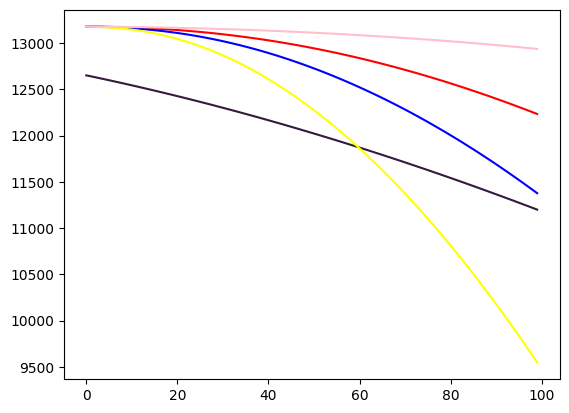

In [ ]:
plt.plot(history_1.history['mean_absolute_error'],label=model_1)
plt.plot(history_2.history["mean_absolute_error"],color='red',label='model_2')
plt.plot(history_3.history["mean_absolute_error"],color='blue',label=model_3)
plt.plot(history_4.history["mean_absolute_error"],color='yellow',label=model_4)
plt.plot(history_5.history["mean_absolute_error"],color='pink',label=model_5)

plt.show()

### **قسمت دوم طراحی مدل**

In [ ]:
model__1 = keras.Sequential([
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 1, activation = 'linear')
])

model__1.compile(optimizer='adam',loss='mean_absolute_error',
        metrics=[keras.metrics.MeanAbsoluteError()])


history__1 = model__1.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = True)

Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 13179.8408 - mean_absolute_error: 13179.8408 - val_loss: 15680.7246 - val_mean_absolute_error: 15680.7246
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 13179.2598 - mean_absolute_error: 13179.2598 - val_loss: 15680.1338 - val_mean_absolute_error: 15680.1338
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 13178.6943 - mean_absolute_error: 13178.6943 - val_loss: 15679.5381 - val_mean_absolute_error: 15679.5381
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 13178.1104 - mean_absolute_error: 13178.1104 - val_loss: 15678.9189 - val_mean_absolute_error: 15678.9189
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 13177.4961 - mean_absolute_error: 13177.4961 - val_loss: 15678.2549 - val_mean_absolute_error: 15678.2549
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 13176.8291 - mean_absolute_error: 13176.82

In [ ]:
model__2 = keras.Sequential([
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 1, activation = 'linear')
])

model__2.compile(optimizer='adam',loss='mean_absolute_error',
        metrics=[keras.metrics.MeanAbsoluteError()])


history__2 = model__2.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = True)

Epoch 1/100
6/6 [==============================] - 1s 43ms/step - loss: 13178.6797 - mean_absolute_error: 13178.6797 - val_loss: 15679.3242 - val_mean_absolute_error: 15679.3242
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 13177.7021 - mean_absolute_error: 13177.7021 - val_loss: 15678.3018 - val_mean_absolute_error: 15678.3018
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 13176.5176 - mean_absolute_error: 13176.5176 - val_loss: 15676.9082 - val_mean_absolute_error: 15676.9082
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 13174.8984 - mean_absolute_error: 13174.8984 - val_loss: 15674.9111 - val_mean_absolute_error: 15674.9111
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 13172.5752 - mean_absolute_error: 13172.5752 - val_loss: 15672.0225 - val_mean_absolute_error: 15672.0225
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 13169.2949 - mean_absolute_error: 13169.

In [ ]:
model__3 = keras.Sequential([
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 1, activation = 'linear')
])

model__3.compile(optimizer='adam',loss='mean_absolute_error',
        metrics=[keras.metrics.MeanAbsoluteError()])


history__3 = model__3.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = True)

Epoch 1/100
6/6 [==============================] - 1s 49ms/step - loss: 13178.9854 - mean_absolute_error: 13178.9854 - val_loss: 15679.6621 - val_mean_absolute_error: 15679.6621
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 13177.7168 - mean_absolute_error: 13177.7168 - val_loss: 15677.4170 - val_mean_absolute_error: 15677.4170
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 13174.2012 - mean_absolute_error: 13174.2012 - val_loss: 15670.9697 - val_mean_absolute_error: 15670.9697
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 13164.1035 - mean_absolute_error: 13164.1035 - val_loss: 15652.2910 - val_mean_absolute_error: 15652.2910
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 13135.2754 - mean_absolute_error: 13135.2754 - val_loss: 15599.7412 - val_mean_absolute_error: 15599.7412
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 13056.2744 - mean_absolute_error: 1305

In [ ]:
model__4 = keras.Sequential([
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 100, input_dim=input_dim, activation='relu'),
    layers.Dense(units = 1, activation = 'linear')
])

model__4.compile(optimizer='adam',loss='mean_absolute_error',
        metrics=[keras.metrics.MeanAbsoluteError()])


history__4 = model__4.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = True)

Epoch 1/100
6/6 [==============================] - 2s 49ms/step - loss: 13178.9277 - mean_absolute_error: 13178.9277 - val_loss: 15679.3379 - val_mean_absolute_error: 15679.3379
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 13176.7500 - mean_absolute_error: 13176.7500 - val_loss: 15674.1963 - val_mean_absolute_error: 15674.1963
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 13167.2002 - mean_absolute_error: 13167.2002 - val_loss: 15652.5752 - val_mean_absolute_error: 15652.5752
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 13128.0400 - mean_absolute_error: 13128.0400 - val_loss: 15565.3447 - val_mean_absolute_error: 15565.3447
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 12975.3105 - mean_absolute_error: 12975.3105 - val_loss: 15232.6875 - val_mean_absolute_error: 15232.6875
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 12413.0850 - mean_absolute_error: 12413.08

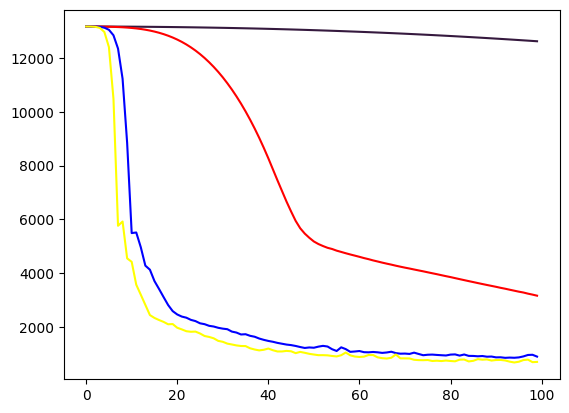

In [ ]:
plt.plot(history__1.history['mean_absolute_error'],label='model__1')
plt.plot(history__2.history["mean_absolute_error"],color='red',label='model__2')
plt.plot(history__3.history["mean_absolute_error"],color='blue',label='model__3')
plt.plot(history__4.history["mean_absolute_error"],color='yellow',label='model__4')

plt.show()

## ِDeep and Wide

In [ ]:
input_=keras.layers.Input(shape=input_dim)
hidden_layer1 = keras.layers.Dense(100, activation="relu")(input_)
hidden_layer2=keras.layers.Dense(100, activation="relu")(hidden_layer1)
hidden_layer3=keras.layers.Dense(100, activation="relu")(hidden_layer2)
hidden_layer4=keras.layers.Dense(100, activation="relu")(hidden_layer3)
hidden_layer5=keras.layers.Dense(100, activation="relu")(hidden_layer4)
hidden_layer6=keras.layers.Dense(100, activation="relu")(hidden_layer5)
hidden_layer7=keras.layers.Dense(100, activation="relu")(hidden_layer6)





concat_layer=keras.layers.Concatenate()([input_,hidden_layer7 ])
output=keras.layers.Dense(1, activation="linear")(concat_layer)
model=keras.Model(inputs=[input_],outputs=[output])


In [ ]:
model.compile(optimizer='adam',loss='mean_absolute_error',
        metrics=[keras.metrics.MeanAbsoluteError()])


history = model.fit(
    X_train_preprocessed.values, y_train.values,
    validation_data = (X_val_preprocessed, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = True)

Epoch 1/100
6/6 [==============================] - 2s 52ms/step - loss: 13179.0342 - mean_absolute_error: 13179.0342 - val_loss: 15679.4434 - val_mean_absolute_error: 15679.4434
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 13177.2256 - mean_absolute_error: 13177.2256 - val_loss: 15675.4414 - val_mean_absolute_error: 15675.4414
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 13169.7646 - mean_absolute_error: 13169.7646 - val_loss: 15658.8076 - val_mean_absolute_error: 15658.8076
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 13139.4600 - mean_absolute_error: 13139.4600 - val_loss: 15591.8350 - val_mean_absolute_error: 15591.8350
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 13020.5088 - mean_absolute_error: 13020.5088 - val_loss: 15334.6279 - val_mean_absolute_error: 15334.6279
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 12583.0342 - mean_absolute_error: 12583

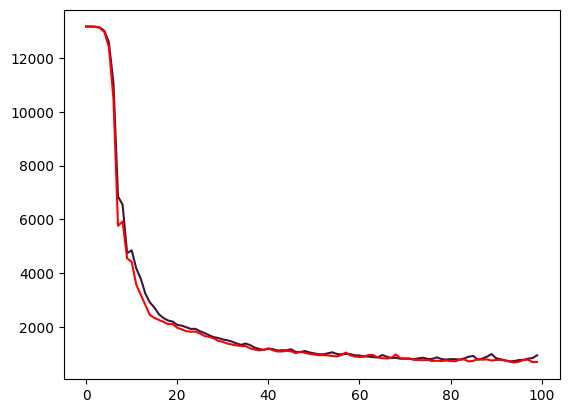

In [ ]:
plt.plot(history.history['mean_absolute_error'],label='model')
plt.plot(history__4.history["mean_absolute_error"],color='red',label='model__4')